## Importing dependencies

In [1]:
import numpy as np
from code_for_hw7 import *
import modules_disp as disp 

## Implementing Neural Networks

### Linear Module

### `Unit Tests cases`

#### `Test case 1` - super_simple_separable()

##### `Forward`

In [2]:
z_1 = linear_1.forward(X)
exp_z_1 =  np.array([[10.41750064, 6.91122168, 20.73366505, 22.8912344],
                     [7.16872235, 3.48998746, 10.46996239, 9.9982611],
                     [-2.07105455, 0.69413716, 2.08241149, 4.84966811]])
unit_test("linear_forward", exp_z_1, z_1)

linear_forward: OK


#### `Backward`

In [3]:
X, Y = super_simple_separable()
dL_dz1 = np.array([[1.69467553e-09, -1.33530535e-06, 0.00000000e+00, -0.00000000e+00],
                                     [-5.24547376e-07, 5.82459519e-04, -3.84805202e-10, 1.47943038e-09],
                                     [-3.47063705e-02, 2.55611604e-01, -1.83538094e-02, 1.11838432e-04]])
exp_dLdX = np.array([[-2.40194628e-02, 1.77064845e-01, -1.27021626e-02, 7.74006953e-05],
                                    [2.39827939e-02, -1.75870737e-01, 1.26832126e-02, -7.72828555e-05]])
dLdX = linear_1.backward(dL_dz1)
unit_test("linear_backward", exp_dLdX, dLdX)

linear_backward: OK


#### `sgd_step`

In [4]:
linear_1.sgd_step(learning_rate)
exp_linear_1_W = np.array([[1.2473734,  0.28294514,  0.68940437],
                           [1.58455079, 1.32055711, -0.69218045]]),
unit_test("linear_sgd_step_W",  exp_linear_1_W,  linear_1.W)

exp_linear_1_W0 = np.array([[6.66805339e-09],
                            [-2.90968033e-06],
                            [-1.01331631e-03]]),
unit_test("linear_sgd_step_W0", exp_linear_1_W0, linear_1.W0)

linear_sgd_step_W: OK
linear_sgd_step_W0: OK


### `Activation Modules`

#### `Tanh - forward`

In [5]:
tanh_1 = Tanh()

In [6]:
exp_a1 = tanh_1.forward(test_1_values['z_1'])
a_1 = test_1_values['a_1']
unit_test("tanh_forward", exp_a1, a_1)

tanh_forward: OK


#### `Tanh-backward`

In [7]:
exp_dL_dz1 = tanh_1.backward(test_1_values['dL_da1'])
dL_dz1 = test_1_values['dL_dz1']
unit_test("tanh_backward", exp_dL_dz1, dL_dz1)

tanh_backward: OK


## Test of deep Neural Networks

### `TEST 1: sgd_test for Tanh activation and SoftMax output`

In [8]:
np.random.seed(0)
sgd_test(Sequential([Linear(2,3), Tanh(), Linear(3,2), SoftMax()], NLL()), test_1_values)

linear_1.W: OK
linear_1.W0: OK
linear_2.W: OK
linear_2.W0: OK
z_1: OK
a_1: OK
z_2: OK
a_2: OK
loss: OK
dloss: OK
dL_dz2: OK
dL_da1: OK
dL_dz1: OK
dL_dX: OK
updated_linear_1.W: OK
updated_linear_1.W0: OK
updated_linear_2.W: OK
updated_linear_2.W0: OK


### `TEST 2: sgd_test for ReLU activation and SoftMax output`

In [9]:
np.random.seed(0)
sgd_test(Sequential([Linear(2,3), ReLU(), Linear(3,2), SoftMax()], NLL()), test_2_values)

linear_1.W: OK
linear_1.W0: OK
linear_2.W: OK
linear_2.W0: OK
z_1: OK
a_1: OK
z_2: OK
a_2: OK
loss: OK
dloss: OK
dL_dz2: OK
dL_da1: OK
dL_dz1: OK
dL_dX: OK
updated_linear_1.W: OK
updated_linear_1.W0: OK
updated_linear_2.W: OK
updated_linear_2.W0: OK


### `TEST 3: sgd_test for 3 levels NN, ReLU activation and SoftMax output on hard data set.`

0 0 3 3


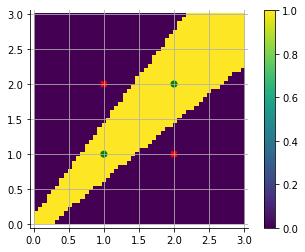

In [10]:
np.random.seed(0)
X, Y = xor()
nn = Sequential([Linear(2, 10), ReLU(), Linear(10, 10), ReLU(), Linear(10,2), SoftMax()], NLL())
disp.classify(X, Y, nn, it=100000)